# Exploring Data to Get High Level Statistics

In [1]:
from __future__ import division
#import required modules
import pandas as pd 
from IPython.display import display
import numpy as np
#matplotlib for additional coustomization
from matplotlib import pyplot as plt
%matplotlib inline

#seaborn for plotting and styling
import seaborn as sns
# to supress printing of exponential notation in pandas
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
#helper functions
def getPecentage(df1, df2):
    return df1.shape[0] / df2.shape[0] * 100

def bold(text_to_bold):
    """
    Bolds given string.
    args:todo
    returns:todo
    """
    bold = "\033[1m"
    reset = "\033[0;0m"
    return bold + text_to_bold + reset

def count_plot(column, axis, df, percent, title=''):
    total_rows = df.shape[0]
    plt.figure(figsize=(16,4))
    if axis == 'x':
        ax = sns.countplot(x=column, data=df)
    elif axis == 'y':
        ax = sns.countplot(y=column, data=df)
    
#     ax.title = title
    
    if percent == 'show' and axis != 'y':
        for p in ax.patches:
            height=p.get_height()
            percent = (height*100)/total_rows
            total_percent = (height*100)/totalrows
            ax.text((p.get_x() + p.get_width()/2), p.get_height()+250, '{:1.1f} %'.format(percent) + ' / ' + '{:1.1f} %'.format(total_percent), ha='center')

### Loading data

In [3]:
data = pd.read_csv('data/FARS.csv')
data = data.drop(labels=['Unnamed: 0'], axis=1)
print "Data shape:"
print "{} Rows x {} Columns".format(str(data.shape[0]), str(data.shape[1]))
data.head(10)

totalrows = len(data.index)

Data shape:
151158 Rows x 17 Columns


## Let's see the distribution of inimpact position

### inimpact: location code of initial impact


total impact points:  24


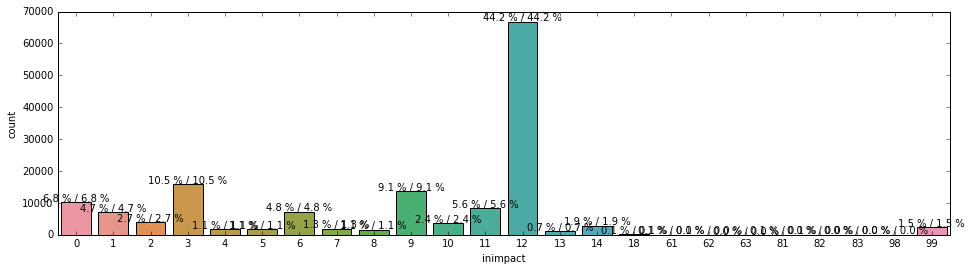

In [4]:
print 'total impact points: ', len(data.inimpact.value_counts().keys())
count_plot('inimpact', 'x', data, 'show', 'Impact dist in accidents')

44% of the accidents by the inimpact 12 (front)

20% by inimpact 3 and 9

### Lets dig down more to see why 44% of the accidents by inimpact 12

In [5]:
filter_ = (data.inimpact == 12)
data_specific_inimpact = data[filter_]

### Effect of  airbags

#### Lets see the type of airbag that deployed in case of impact 12

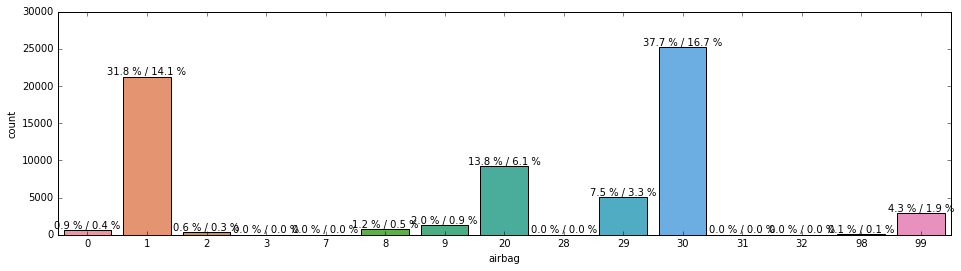

In [6]:
count_plot('airbag', 'x', data_specific_inimpact, 'show')

In 37% cases, there wasn't any airbag installed in the car for both driver and the passenger.

In 31% cases where airbag 1 (front) were the airbags that were deployed.

In 14% cases, airbags were installed but couldn't deployed

#### Were they deployed? When they were available for both passenger and the driver

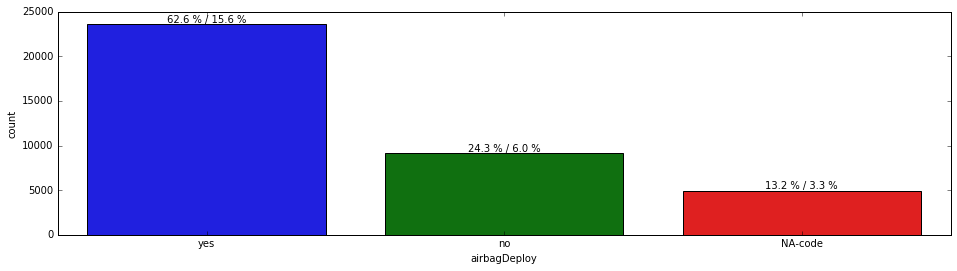

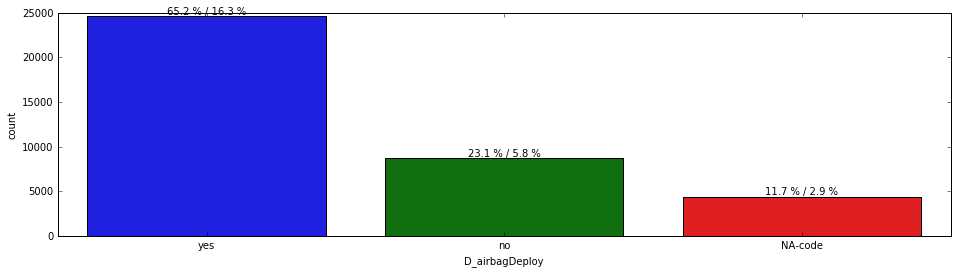

In [7]:
filter_ = (data_specific_inimpact.D_airbagAvail == 'yes') & (data_specific_inimpact.airbagAvail == 'yes')
data_impact_aibagAvail = data_specific_inimpact[filter_]

count_plot('airbagDeploy', 'x', data_impact_aibagAvail, 'show') # passenger's airbag deployement status 
count_plot('D_airbagDeploy', 'x', data_impact_aibagAvail, 'show') # driver's airbag deployement status

Airbag weren't deployed in around 24% of the cases when impact was 12.
Passenger's one malfunctioned more

#### Lets see some stats about airbag 1 (front deployed for both or not)

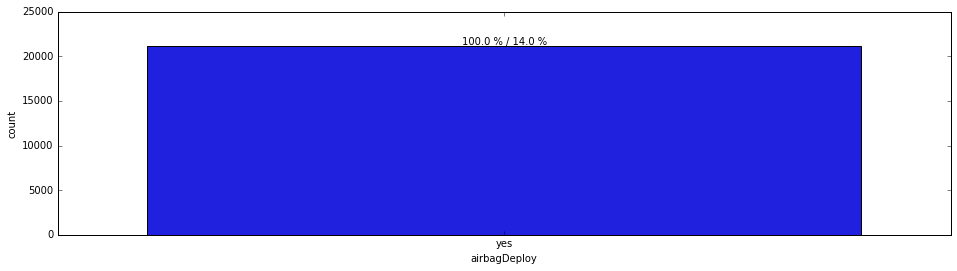

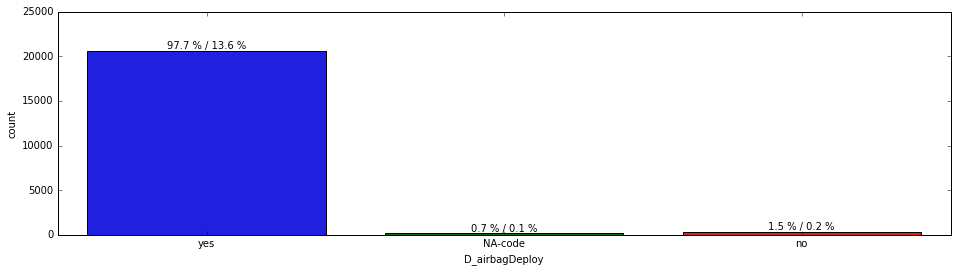

In [8]:
filter_ = (data_specific_inimpact.airbag == 1) & (data_specific_inimpact.airbagAvail == 'yes') & (data_specific_inimpact.D_airbagAvail == 'yes')
data_inimpact_airbag1 = data_specific_inimpact[filter_]
count_plot('airbagDeploy', 'x', data_inimpact_airbag1, 'show')
count_plot('D_airbagDeploy', 'x', data_inimpact_airbag1, 'show')

Paseenger's airbag always worked but driver's aibag malfuntioned 1.5% of the cases

# WHOLE DATA

### Lets see if seatbelt were fastened

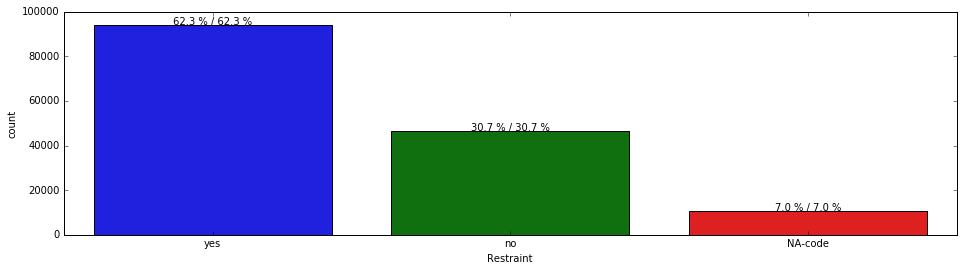

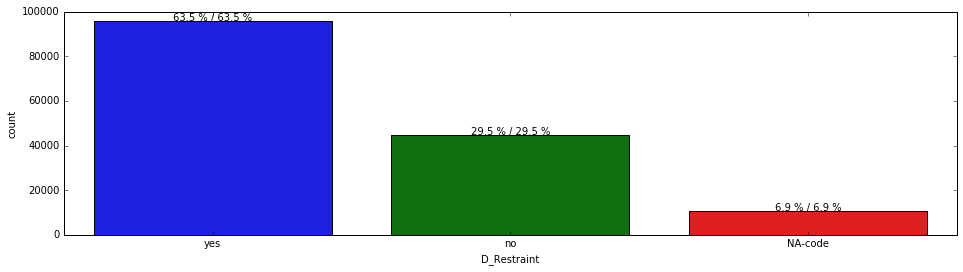

In [9]:
count_plot('Restraint', 'x', data, 'show')
count_plot('D_Restraint', 'x', data, 'show')

### Airbag's Stats

In [10]:
filter_ = (data.D_airbagAvail == 'yes') & (data.airbagAvail == 'yes')
airbag_data = data[filter_]
print 'Both had airbag Avail: ', getPecentage(airbag_data, data), '%'

Both had airbag Avail:  56.8795564906 %


In [11]:
filter_ = (airbag_data.D_airbagDeploy == 'yes') & (airbag_data.airbagDeploy == 'no')
print 'ONLY Passenger\'s airbag malfucntioned ', getPecentage(airbag_data[filter_], data), '%'

ONLY Passenger's airbag malfucntioned  1.46072321677 %


In [12]:
filter_ = (airbag_data.D_airbagDeploy == 'no') & (airbag_data.airbagDeploy == 'yes')
print 'ONLY Driver\'s airbag malfucntioned ', getPecentage(airbag_data[filter_], data), '%'

ONLY Driver's airbag malfucntioned  0.751531510076 %


In [13]:
filter_ = (data.D_airbagDeploy == 'no') & (data.airbagDeploy == 'no')
print 'Both\'s airbag malfucntioned ', getPecentage(airbag_data[filter_], data), '%'

Both's airbag malfucntioned  18.3437198164 %


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Death's stats

In [18]:
def addDeathType(row):
    if (row.D_injury != 4) & (row.injury != 4):
        return 'None'
    elif (row.D_injury == 4) & (row.injury == 4):
        return 'Both'
    elif (row.D_injury != 4) & (row.injury == 4):
        return 'Passenger only'
    else:
        return 'Driver only'
data['death_type'] = data.apply(addDeathType, axis=1)

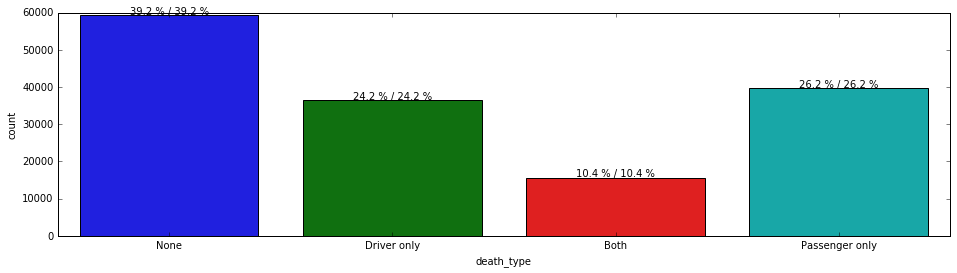

In [15]:
count_plot('death_type', 'x', data, 'show')

In [22]:
death_grp_data = data.groupby(['inimpact', 'death_type']).count().reset_index()
death_grp_data.rename(columns={'caseid': 'death_type_count'}, inplace=True)
death_grp_data = death_grp_data[['inimpact', 'death_type', 'death_type_count']]

   inimpact      death_type  caseid  state   age  airbag  injury  restraint  \
0         0            Both     707    707   707     707     707        707   
1         0     Driver only    3996   3996  3996    3996    3996       3996   
2         0            None    2199   2199  2199    2199    2199       2199   
3         0  Passenger only    3384   3384  3384    3384    3384       3384   
4         1            Both     576    576   576     576     576        576   

    sex  modelyr  airbagAvail  airbagDeploy  Restraint  D_injury  \
0   707      707          707           707        707       707   
1  3996     3996         3996          3996       3996      3996   
2  2199     2199         2199          2199       2199      2199   
3  3384     3384         3384          3384       3384      3384   
4   576      576          576           576        576       576   

   D_airbagAvail  D_airbagDeploy  D_Restraint  year  
0            707             707          707   707  
1       

,inimpact,death_type,death_type_count
0,0,Both,707
1,0,Driver only,3996
2,0,None,2199
3,0,Passenger only,3384
4,1,Both,576


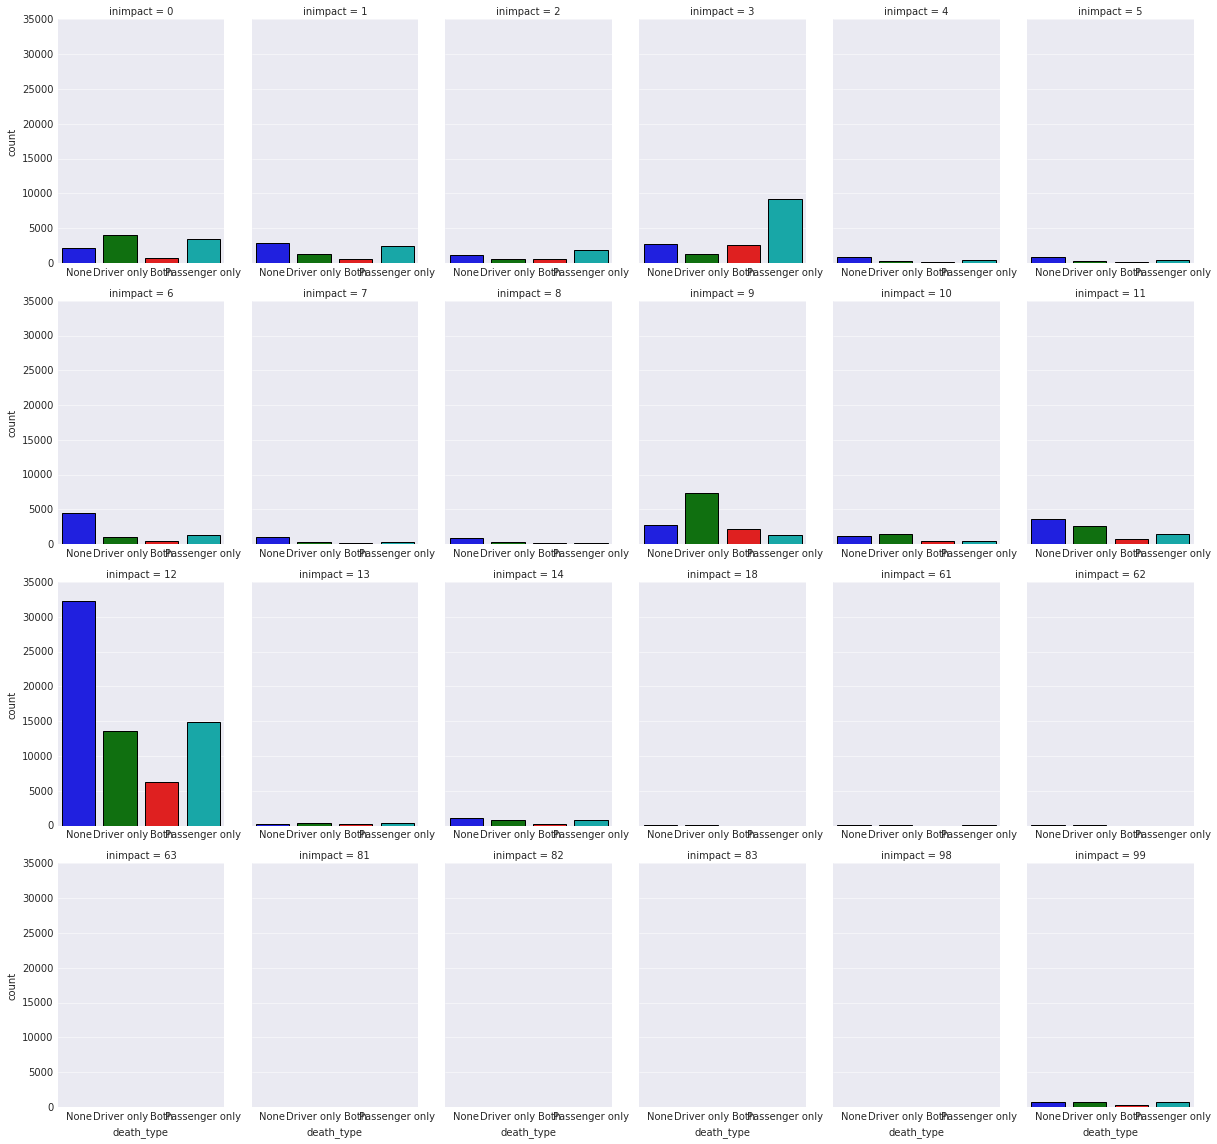

In [20]:
#### plt.figure(figsize=(16, 10))
# sns.barplot(x='inimpact', y='death_type_count', hue='death_type', data=death_grp_data)
sns.set_style('darkgrid', {'legend.frameon':True})
g = sns.factorplot(x="death_type",
                   col="inimpact", 
                   data=data, col_wrap=6, kind="count", size=4, aspect=0.7,
                   sharex=False
                  )
